In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
data=pd.read_csv('churn_data.csv')
data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [10]:
data.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [12]:
data.nunique()

tenure       68
age          51
address      40
income      101
ed            5
employ       35
equip         2
callcard      2
wireless      2
longmon     157
tollmon      65
equipmon     82
cardmon      92
wiremon      57
longten     198
tollten      99
cardten     124
voice         2
pager         2
internet      2
callwait      2
confer        2
ebill         2
loglong     157
logtoll      65
lninc       101
custcat       4
churn         2
dtype: int64

In [13]:
data.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,200.0,35.505000,21.640971,1.000,16.75000,33.500,55.2500,72.000
age,200.0,41.165000,13.076803,19.000,31.00000,40.000,51.0000,76.000
address,200.0,11.650000,10.158419,0.000,3.00000,9.000,18.0000,48.000
income,200.0,75.130000,128.430468,9.000,31.00000,48.000,80.0000,1668.000
ed,200.0,2.825000,1.285550,1.000,2.00000,3.000,4.0000,5.000
employ,200.0,10.225000,8.957430,0.000,3.00000,7.500,17.0000,44.000
equip,200.0,0.425000,0.495584,0.000,0.00000,0.000,1.0000,1.000
callcard,200.0,0.705000,0.457187,0.000,0.00000,1.000,1.0000,1.000
wireless,200.0,0.290000,0.454901,0.000,0.00000,0.000,1.0000,1.000
longmon,200.0,11.789250,9.887250,1.100,5.53750,8.250,14.3000,62.300


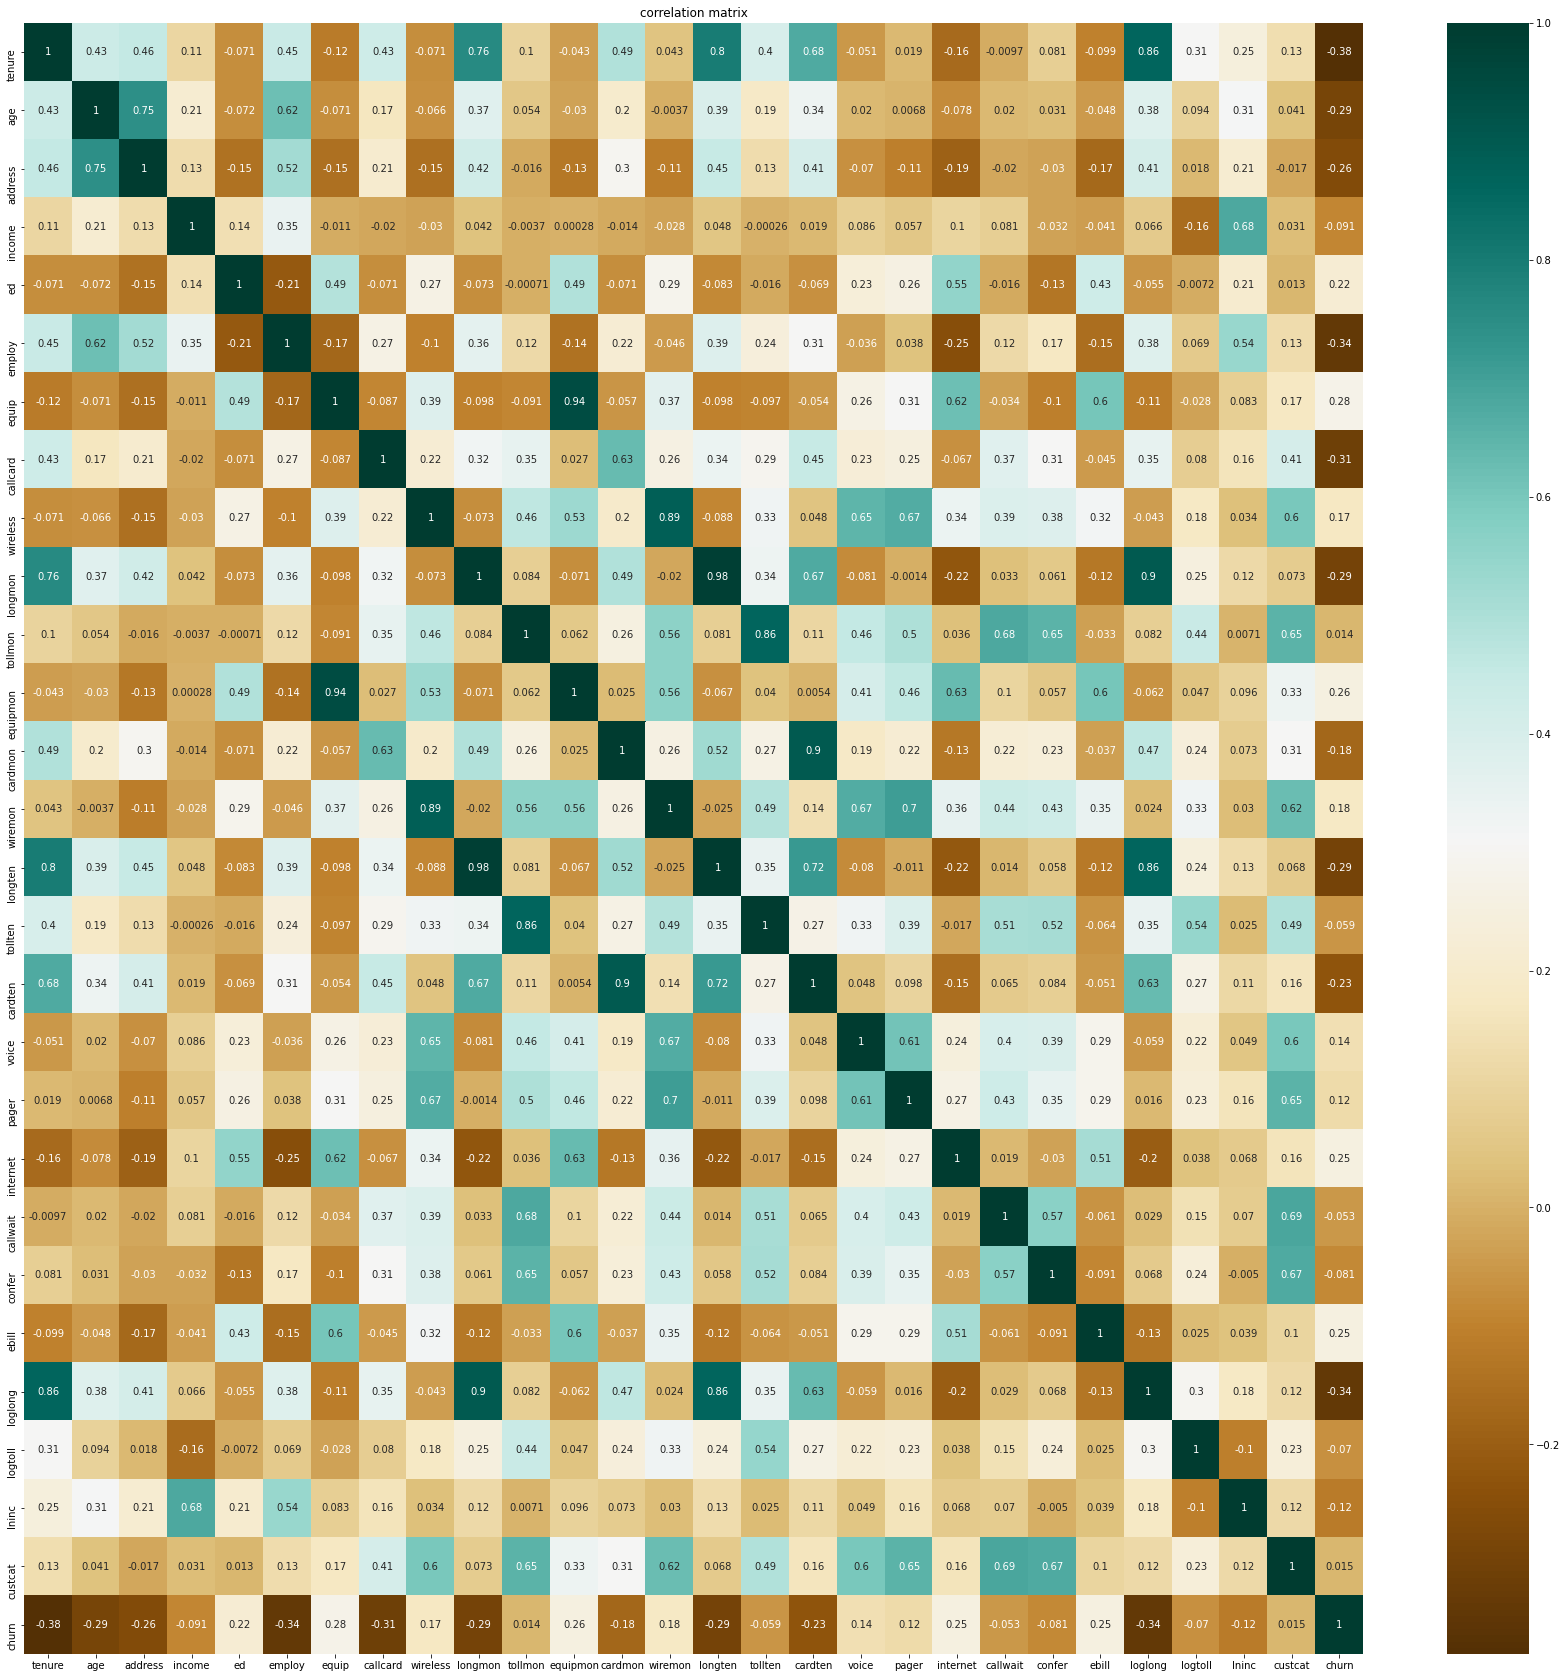

In [16]:
## corelation

plt.figure(figsize=(30,30))
c=data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
plt.title('correlation matrix')
plt.show()

correlation...takeout label churn only with positive correlations

find labels inbalance and balance 

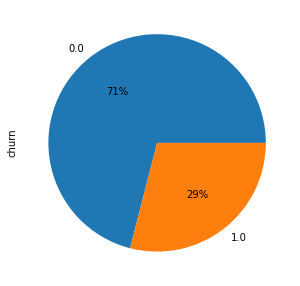

In [18]:
plot=data.churn.value_counts().plot.pie(y='churn',figsize=(5,5),autopct=('%1.0f%%'))

## 0 - customer regin
 ## 1- customer los

In [19]:
data.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [26]:
## take the postive correltion datas
data=pd.read_csv('churn_data.csv',usecols=['ed','equip','wireless','tollmon','equipmon','wiremon','voice', 'pager','internet','ebill','custcat', 'churn'])
data.head()

,ed,equip,wireless,tollmon,equipmon,wiremon,voice,pager,internet,ebill,custcat,churn
0,5.0,0.0,1.0,20.75,0.0,35.7,1.0,1.0,0.0,0.0,4.0,1.0
1,2.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,2.0,1.0,1.0,45.00,50.1,64.9,1.0,1.0,1.0,1.0,4.0,0.0
4,2.0,0.0,0.0,22.00,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0


In [28]:
## need to convert float to int 
data['churn']=data['churn'].astype('int')
data.head()

,ed,equip,wireless,tollmon,equipmon,wiremon,voice,pager,internet,ebill,custcat,churn
0,5.0,0.0,1.0,20.75,0.0,35.7,1.0,1.0,0.0,0.0,4.0,1
1,2.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
3,2.0,1.0,1.0,45.00,50.1,64.9,1.0,1.0,1.0,1.0,4.0,0
4,2.0,0.0,0.0,22.00,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0


In [36]:
# convert data inti array 

x=np.asarray(data.drop('churn',axis=1))

x

array([[5., 0., 1., ..., 0., 0., 4.],
       [2., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 3.],
       ...,
       [1., 0., 0., ..., 0., 0., 3.],
       [4., 0., 1., ..., 1., 1., 4.],
       [2., 1., 1., ..., 1., 1., 2.]])

In [32]:
y=np.asarray(data['churn'])
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [38]:
## we need to standardize the feature data set 


from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
x[0:5]

array([[ 1.6961288 , -0.85972695,  1.56469673,  0.48126577, -0.80905935,
         1.08826163,  1.54590766,  1.62368828, -0.88640526, -0.88640526,
         1.41630855],
       [-0.6433592 , -0.85972695, -0.63910148, -0.84846321, -0.80905935,
        -0.56616669, -0.64686916, -0.61588176, -0.88640526, -0.88640526,
        -1.36987221],
       [-1.42318853, -0.85972695, -0.63910148, -0.84846321, -0.80905935,
        -0.56616669, -0.64686916, -0.61588176, -0.88640526, -0.88640526,
         0.48758163],
       [-0.6433592 ,  1.16316   ,  1.56469673,  2.03528638,  1.75909826,
         2.44146351,  1.54590766,  1.62368828,  1.12815215,  1.12815215,
         1.41630855],
       [-0.6433592 , -0.85972695, -0.63910148,  0.56136992, -0.80905935,
        -0.56616669,  1.54590766, -0.61588176, -0.88640526, -0.88640526,
         0.48758163]])

In [39]:
## splitting,fitting

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
lr=LogisticRegression(C=0.001,solver='liblinear')
lr.fit(xtrain,ytrain)

## shift+tab ...show u doc of logistic

LogisticRegression(C=0.001, solver='liblinear')

In [40]:
ypred=lr.predict(xtest)
ypred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [42]:
yprob_pred=lr.predict_proba(xtest)
yprob_pred

array([[0.49657376, 0.50342624],
       [0.46614614, 0.53385386],
       [0.53297811, 0.46702189],
       [0.49526801, 0.50473199],
       [0.53315676, 0.46684324],
       [0.4738801 , 0.5261199 ],
       [0.50980149, 0.49019851],
       [0.48554582, 0.51445418],
       [0.48917612, 0.51082388],
       [0.52079836, 0.47920164],
       [0.52450695, 0.47549305],
       [0.52430284, 0.47569716],
       [0.52069029, 0.47930971],
       [0.53018606, 0.46981394],
       [0.49661368, 0.50338632],
       [0.52267451, 0.47732549],
       [0.49786007, 0.50213993],
       [0.50327037, 0.49672963],
       [0.52050248, 0.47949752],
       [0.53027545, 0.46972455],
       [0.52730266, 0.47269734],
       [0.48394738, 0.51605262],
       [0.47709007, 0.52290993],
       [0.4826803 , 0.5173197 ],
       [0.52155598, 0.47844402],
       [0.51128869, 0.48871131],
       [0.51471993, 0.48528007],
       [0.53018606, 0.46981394],
       [0.53018606, 0.46981394],
       [0.51935601, 0.48064399],
       [0.

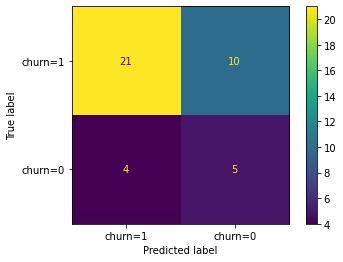

In [48]:
## confusion matrix

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import log_loss


plot_confusion_matrix(lr,xtest,ytest,display_labels=['churn=1','churn=0'])

In [55]:
log=log_loss(ytest,yprob_pred)
score=lr.score(xtest,ytest)
print('log_loss value:',log)
print('score value:',score)

log_loss value: 0.6762923398849016
score value: 0.65
